In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# all dims taken from https://api.vex.com/vr/home/playgrounds/v5rc_high_stakes/field_details.html
field_size = 3600  # vex field is 3600mm x 3600mm
resolution = 10    # scale down to 72 x 72 grid, so each cell is 50mm x 50mm
grid_size = field_size // resolution  # num cells per side

occupancy_grid = np.zeros((grid_size, grid_size), dtype=int) # occ grid starts empty

In [16]:
# climb ladder leg positions
leg_positions = [
    (1800, 1200),
    (2400, 1800),
    (1800, 2400),
    (1200, 1800)
]

In [17]:
for leg_position in leg_positions:
    x, y = leg_position
    x_cell = x // resolution
    y_cell = y // resolution
    occupancy_grid[y_cell, x_cell] = 1

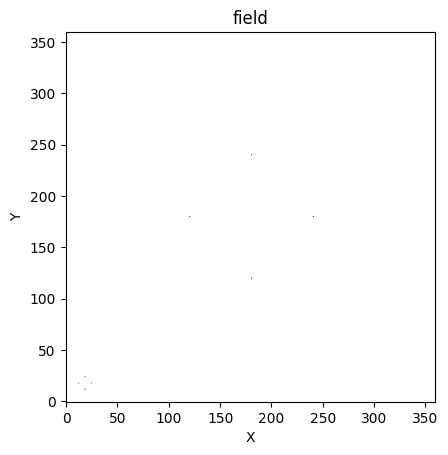

In [18]:
import matplotlib.pyplot as plt

plt.imshow(occupancy_grid, cmap='Greys', origin='lower') # taken from 485 lul
plt.title("field")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
